In [1]:
import pandas as pd
import scraper

# Cleaning and preparing the frames

In [2]:
stats_df = pd.read_csv('csv/players_stats.csv')
stats_df.head()

,sofifa_id,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,20801,94,94,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN
1,158023,94,94,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN
2,190871,92,93,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
3,193080,91,93,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0
4,192985,91,92,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fplayers_stats = stats_df.iloc[:,[0,1,4,5,6,7]]
fplayers_stats['overall'] = round(fplayers_stats.iloc[:,2:].mean(axis=1))
fplayers_stats.head()

,sofifa_id,overall,shooting,passing,dribbling,defending
0,20801,74.0,93.0,81.0,89.0,35.0
1,158023,77.0,91.0,88.0,96.0,32.0
2,190871,74.0,84.0,83.0,95.0,32.0
3,193080,NaN,NaN,NaN,NaN,NaN
4,192985,81.0,86.0,92.0,87.0,60.0


In [4]:
fplayers_data = pd.read_csv('csv/players_data.csv')
fplayers_data.head()

,sofifa_id,short_name,long_name,age,nationality,club,team_position
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,Portugal,Juventus,LW
1,158023,L. Messi,Lionel Andrés Messi Cuccittini,31,Argentina,FC Barcelona,RW
2,190871,Neymar Jr,Neymar da Silva Santos Junior,26,Brazil,Paris Saint-Germain,CAM
3,193080,De Gea,David De Gea Quintana,27,Spain,Manchester United,GK
4,192985,K. De Bruyne,Kevin De Bruyne,27,Belgium,Manchester City,RCM


In [5]:
fplayers_stats_r = pd.read_csv('csv/fplayer_scraps/results_clean.csv')

fplayers_stats_r.head()

,sofifa_id,mean_shooting,mean_passing,mean_dribbling,mean_defending,mean_impact,overall
0,20801.0,70.0,60.0,70.0,60.0,70.0,66.0
1,158023.0,80.0,80.0,90.0,70.0,90.0,82.0
2,190871.0,70.0,60.0,70.0,60.0,80.0,68.0
3,192985.0,50.0,60.0,70.0,70.0,80.0,66.0
4,155862.0,40.0,60.0,70.0,70.0,70.0,62.0


In [6]:
game_real_stats = pd.merge(fplayers_stats, fplayers_stats_r, on='sofifa_id')
game_real_stats = pd.merge(game_real_stats, fplayers_data.iloc[:,[0,1,3,5,6]], on='sofifa_id')
new_index = ['sofifa_id', 'short_name', 'age', 'club',	'team_position', 'overall_x', 'overall_y', 'shooting', 'mean_shooting', 'passing', 'mean_passing', 'dribbling', 'mean_dribbling', 'defending', 'mean_defending', 'mean_impact']
game_real_stats = game_real_stats[new_index] 
game_real_stats.head()

,sofifa_id,short_name,age,club,team_position,overall_x,overall_y,shooting,mean_shooting,passing,mean_passing,dribbling,mean_dribbling,defending,mean_defending,mean_impact
0,20801,Cristiano Ronaldo,33,Juventus,LW,74.0,66.0,93.0,70.0,81.0,60.0,89.0,70.0,35.0,60.0,70.0
1,158023,L. Messi,31,FC Barcelona,RW,77.0,82.0,91.0,80.0,88.0,80.0,96.0,90.0,32.0,70.0,90.0
2,190871,Neymar Jr,26,Paris Saint-Germain,CAM,74.0,68.0,84.0,70.0,83.0,60.0,95.0,70.0,32.0,60.0,80.0
3,192985,K. De Bruyne,27,Manchester City,RCM,81.0,66.0,86.0,50.0,92.0,60.0,87.0,70.0,60.0,70.0,80.0
4,155862,Sergio Ramos,32,Real Madrid,LCB,74.0,62.0,63.0,40.0,71.0,60.0,71.0,70.0,91.0,70.0,70.0


In [7]:
game_real_stats_t = game_real_stats.T

# Plotting the data

I will use functions from scrape library (bar_plot, scatter_plot and player_plot)

## Compare by skill

Bar plot to see how different the stats are, in general, among correlated skills.

array([<AxesSubplot:title={'center':'defending'}>,
       <AxesSubplot:title={'center':'mean_defending'}>], dtype=object)

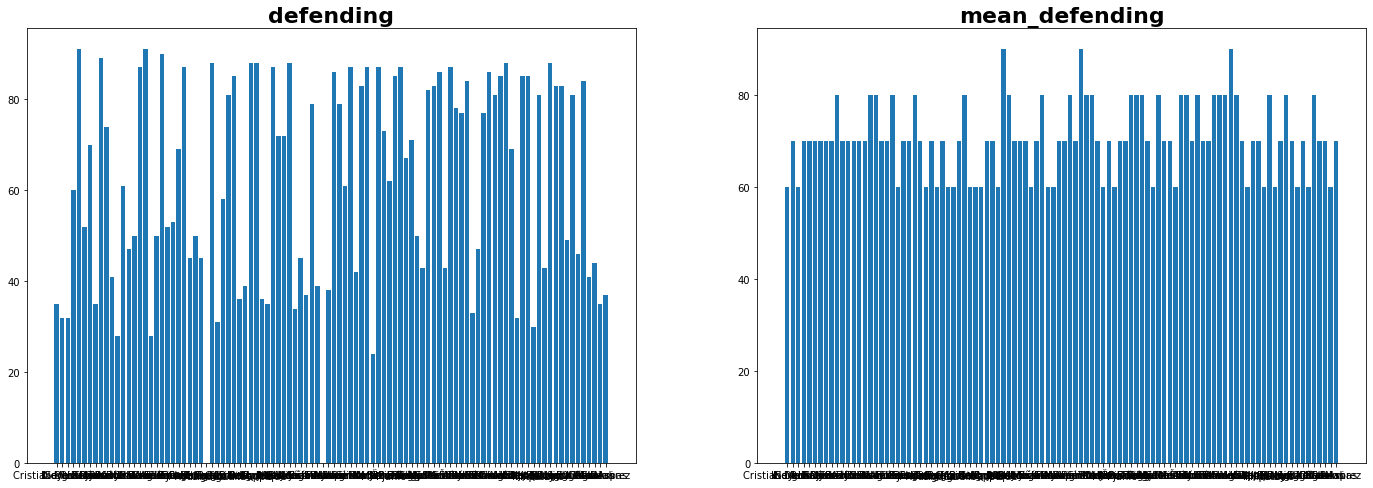

In [8]:
#scraper.bar_plot(game_real_stats, 'overall_x', 'overall_y')
#scraper.bar_plot(game_real_stats, 'shooting', 'mean_shooting')
#scraper.bar_plot(game_real_stats, 'passing', 'mean_passing')
#scraper.bar_plot(game_real_stats, 'dribbling', 'mean_dribbling')
scraper.bar_plot(game_real_stats, 'defending', 'mean_defending')

## Correlation

Scatter plot to see correlations among real-life and videogame skills.

<AxesSubplot:xlabel='defending', ylabel='mean_defending'>

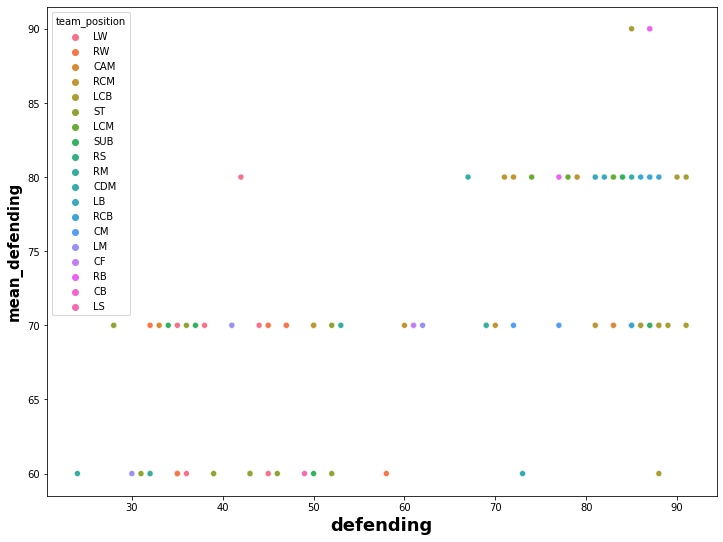

In [9]:
# hue= can be pass as argument for the columns 'short_name', 'team_position' or 'age'

#scraper.scatter_plot(game_real_stats, 'overall_x', 'overall_y')
#scraper.scatter_plot(game_real_stats, 'shooting', 'mean_shooting')
#scraper.scatter_plot(game_real_stats, 'passing', 'mean_passing')
#scraper.scatter_plot(game_real_stats, 'dribbling', 'mean_dribbling')
scraper.scatter_plot(game_real_stats, 'defending', 'mean_defending', hue='team_position')

## Compare by player

Stats for each of the players, real-life in green and videogame in orange. Insert as argument the index correspondent to each of the players from the list below.

In [10]:
print(game_real_stats_t.iloc[1,:].to_dict())

{0: 'Cristiano Ronaldo', 1: 'L. Messi', 2: 'Neymar Jr', 3: 'K. De Bruyne', 4: 'Sergio Ramos', 5: 'L. Suárez', 6: 'L. Modrić', 7: 'E. Hazard', 8: 'D. Godín', 9: 'T. Kroos', 10: 'R. Lewandowski', 11: 'P. Dybala', 12: 'Isco', 13: 'H. Kane', 14: 'A. Griezmann', 15: 'N. Kanté', 16: 'G. Chiellini', 17: 'S. Agüero', 18: 'David Silva', 19: 'M. Hummels', 20: 'E. Cavani', 21: 'C. Eriksen', 22: 'P. Pogba', 23: 'Casemiro', 24: 'Coutinho', 25: 'J. Rodríguez', 26: 'M. Salah', 27: 'G. Buffon', 28: 'Thiago Silva', 29: 'G. Higuaín', 30: 'G. Bale', 31: 'Marcelo', 32: 'Sergio Busquets', 33: 'L. Insigne', 34: 'K. Mbappé', 35: 'S. Umtiti', 36: 'K. Koulibaly', 37: 'M. Icardi', 38: 'R. Lukaku', 39: 'Piqué', 40: 'I. Rakitić', 41: 'M. Hamšík', 42: 'J. Vertonghen', 43: 'D. Mertens', 44: 'A. Sánchez', 45: 'P. Aubameyang', 46: 'Jordi Alba', 47: 'C. Immobile', 48: 'K. Navas', 49: 'L. Sané', 50: 'R. Varane', 51: 'M. Verratti', 52: 'Roberto Firmino', 53: 'Azpilicueta', 54: 'S. Mané', 55: 'Fernandinho', 56: 'Naldo', 

<AxesSubplot:title={'center':'Koke'}, xlabel='Specifications', ylabel='82'>

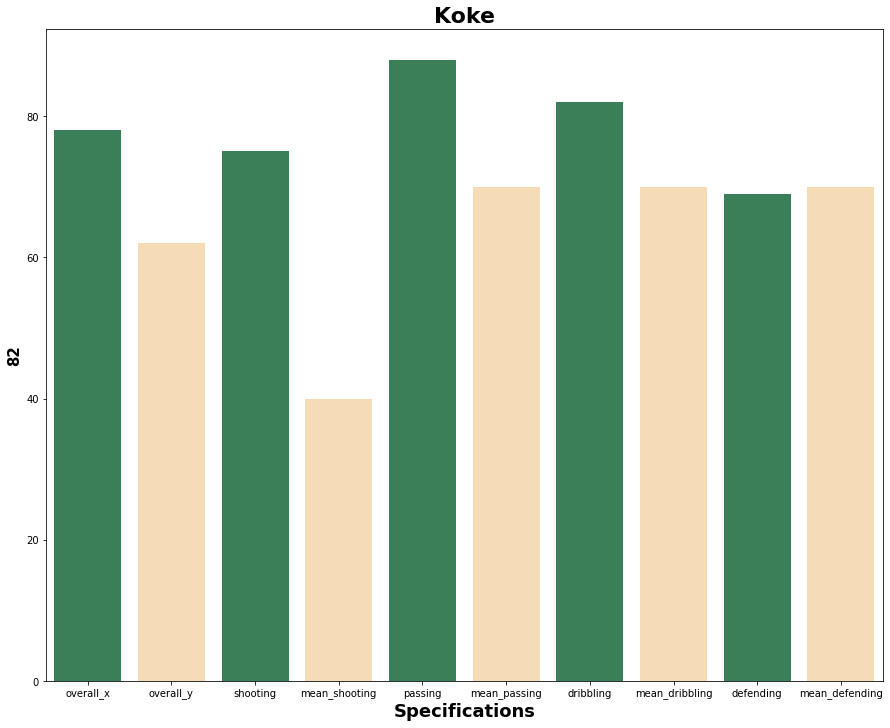

In [11]:
# player argument must be pass as player index (list is above, this coul be improved)
scraper.player_plot(game_real_stats_t, 82)